The data read by the dicom is in format of:  <class 'numpy.ndarray'>
The data itself is in type of:  <class 'numpy.uint16'>
Current dicom image is of size:  (4084, 3328)
-------------------------------
The data now in ftype of:  <class 'numpy.float32'>
-------------------------------
After converting to RGB color space using opencv: 
(4084, 3328, 3)
<class 'numpy.uint16'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-------------------------------
After converting to RGB color space using scikit-image:
(4084, 3328, 3)
<class 'numpy.uint16'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-------------------------------


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

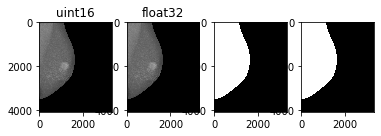

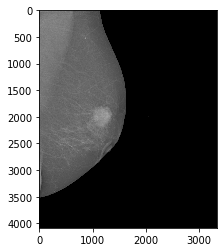

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom as dicom
from PIL import Image, ImageMath
import cv2 
import skimage.color

file_name = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999432_f62fbf38fb208316_MG_L_ML_ANON.dcm'
dicom_data = dicom.dcmread(file_name)
# Convert the dicom object into numpy array.
data = dicom_data.pixel_array

# data is in np.narray and uint16 after reading through dicom.
print("The data read by the dicom is in format of: ",type(data))
print("The data itself is in type of: ", type(data[0, 0]))
print("Current dicom image is of size: ", data.shape)

# Plot the uint16 data in gray color scale.
fig = plt.figure()
plt.subplot(141)
# Set color map to gray scale
plt.imshow(data, cmap = 'gray')
plt.title("uint16")

print("-------------------------------")
# Convert from uint16 to float32 by numpy.
data_float32 = np.float32(data)
print("The data now in ftype of: ", type(data_float32[0, 0]))
# Plot the float32 data in gray color scale.
plt.subplot(142)
plt.imshow(data_float32, cmap = 'gray')
plt.title("float32")

print("-------------------------------")
# Try cv2 for converting from gray to RGB.
data_rgb =cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)
print("After converting to RGB color space using opencv: ")
print(data_rgb.shape)
print(type(data_rgb[1,1,1]))
plt.subplot(143)
plt.imshow(data_rgb)


print("-------------------------------")
# Try scikit-image for converting from gray to RGB.
# Note that this method is used in the keras-retinanet for reading dicom images, what it does is basically duplicating the single
# channel given by dicom into three.
test_ski_rgb = skimage.color.gray2rgb(data)
print("After converting to RGB color space using scikit-image:")
print(test_ski_rgb.shape)
print(type(test_ski_rgb[1,1,1]))
# print(test_ski_rgb == data_rgb)
plt.subplot(144)
plt.imshow(test_ski_rgb)
# Not working here 
cv2.rectangle(data, (240, 640), (240, 500),[0, 255, 0] , 2)
cv2.putText(data, "Test here", (2000, 2000), cv2.FONT_HERSHEY_PLAIN, 1, [255, 255, 255], 1)


print("-------------------------------")
# Draw bbox and caption on gray scale image?
# How to draw a colored rentangle on a gray scale image?
# https://stackoverflow.com/questions/35780054/drawing-a-colored-rectangle-in-a-grayscale-image-using-opencv
fig = plt.figure()
plt.imshow(data, cmap = 'gray')
# plt.imshow(cv2.cvtColor(data, cv2.COLOR_GRAY2BGR), cmap = 'gray')
cv2.rectangle(data, (240, 640), (240, 500),[0, 255, 0] , 2)
cv2.putText(data, "Test here", (2000, 2000), cv2.FONT_HERSHEY_PLAIN, 1, [255, 255, 255], 1)

In [36]:
# Testing some methods of converting the uint16 into other types of data
import numpy as np
import cv2
from PIL import Image

test = np.array([[20,2], [511,3]], dtype = np.uint16)
print(test)
print(type(test[1,1]))

data_aftre_scale = cv2.convertScaleAbs(test, alpha=(255.0/65535.0))
print(data_aftre_scale)
print(type(data_aftre_scale[1,1]))

# Force converting directly using np.uint8, which is not a good idea I think. 
data_uint8 = np.uint8(test)
print(data_uint8)
print(type(data_uint8[1,1]))

data_rescale = cv2.convertScaleAbs(test, alpha = (1/65535))
print(data_rescale)
print(type(data_rescale[1,1]))

a = np.uint8(20)
print(type(a))
b = a / np.float32(a)
print(b)
print(type(b))

file_name = r'D:/Studying/tensorflow_scripts/RetinaNet_project/test_Keras/image_test/Rem (1).png'
test_image = cv2.imread(file_name)
print(type(test_image[1,1,1]))
test_image_1 = test_image / np.float32(255)
test_image_1

[[ 20   2]
 [511   3]]
<class 'numpy.uint16'>
[[0 0]
 [2 0]]
<class 'numpy.uint8'>
[[ 20   2]
 [255   3]]
<class 'numpy.uint8'>
[[0 0]
 [0 0]]
<class 'numpy.uint8'>
<class 'numpy.uint8'>
1.0
<class 'numpy.float32'>
<class 'numpy.uint8'>


array([[[0.        , 0.        , 0.03529412],
        [0.        , 0.        , 0.03529412],
        [0.        , 0.        , 0.03529412],
        ...,
        [0.        , 0.        , 0.03137255],
        [0.        , 0.        , 0.03137255],
        [0.        , 0.00784314, 0.04705882]],

       [[0.09803922, 0.14901961, 0.23921569],
        [0.09803922, 0.14901961, 0.23921569],
        [0.09803922, 0.14901961, 0.23921569],
        ...,
        [0.10588235, 0.2784314 , 0.36078432],
        [0.10196079, 0.26666668, 0.3529412 ],
        [0.09803922, 0.25882354, 0.34901962]],

       [[0.09019608, 0.14509805, 0.25490198],
        [0.09019608, 0.14509805, 0.25490198],
        [0.09019608, 0.14509805, 0.25490198],
        ...,
        [0.07843138, 0.2784314 , 0.38039216],
        [0.07450981, 0.2627451 , 0.36862746],
        [0.07450981, 0.25882354, 0.36862746]],

       ...,

       [[0.05490196, 0.10980392, 0.13333334],
        [0.05882353, 0.10980392, 0.12941177],
        [0.05098039, 0

(4084, 3328)
*******************************
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


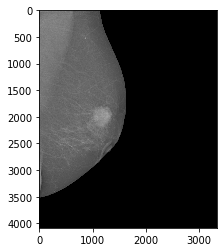

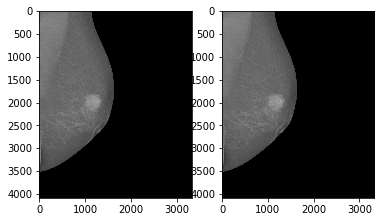

In [20]:
import numpy as np
import cv2
from PIL import Image
import pydicom as dicom
from matplotlib import pyplot as plt
import skimage.color

file_name = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999432_f62fbf38fb208316_MG_L_ML_ANON.dcm'
dicom_data = dicom.dcmread(file_name)
data = dicom_data.pixel_array
# Conver into RGB using scikit-image
test_ski_rgb = skimage.color.gray2rgb(data)

print(data.shape)
plt.figure(1)
plt.imshow(data, cmap = 'gray')
# test_mimic_rgb = np.zeros([4084, 3328, 3])
# test_mimic_rgb[:,:,0] = data
# test_mimic_rgb[:,:,1] = data
# test_mimic_rgb[:,:,2] = data
# plt.imshow(test_mimic_rgb)

plt.imsave("test_here.png", data, cmap = 'gray')

file_name_2 = r'D:\Studying\tensorflow_scripts\RetinaNet_project\test_Keras\numpy_array_images_testing_space\test_here.png'
test_2 = cv2.imread(file_name_2)
test_3 = cv2.cvtColor(test_2, cv2.COLOR_BGR2RGB)

plt.figure(2)
plt.subplot2grid((1,2), (0,0))
plt.imshow(test_2)
plt.subplot2grid((1,2), (0,1))
plt.imshow(test_3)
# plt.imshow(test_3, cmap='gray')

print("*******************************")
print(test_2 == test_3[:,:,::-1])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


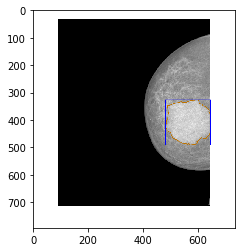

In [17]:
# One of the image saved by MATLAB
import numpy as np
import cv2
from PIL import Image
import pydicom as dicom
from matplotlib import pyplot as plt

file_path = r'D:\Studying\RetinaNet_Project\INbreast_biggest_mass.png'
test = cv2.imread(file_path)
print(test)
plt.imshow(test)

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import skimage.color

# Construct 16-bit gradient greyscale image
im = np.arange(65536,dtype=np.uint16).reshape(256,256)

print(im)
print(type(im[1,1]))
# Save as TIFF with PIL/Pillow
Image.fromarray(im).save('result.tif')
# cv2.imwrite('result_2.tif', im)
# Read image back from disk into PIL Image
im2 = Image.open('result.tif')   

# -1 means reading the image with its original format
# im3 = cv2.imread('result_2.tif', -1)

# print(type(im3[1,1]))
# Convert PIL Image to Numpy array
im2 = np.array(im2)
print("***************************")
print(type(im2[1,1]))
# print("Using OpenCV to read tif file: ", type(im3[1,1]))
# Make first pixel mid-grey
im2[0][0] = 32768
plt.figure(1)
plt.imshow(im2, cmap='gray')


# I suppose that for .tif image, MATLAB and Python(PIL) provide different format of storing?
# For Matlab is uint8, and uint16 for Python? (using PIL)

The shape of original DICOM image is:  (4084, 3328)
**********************************************
DICOM image stored in tiff format: <class 'numpy.uint16'>
DICOM image stored in tiff format has shape of:  (4084, 3328)
**********************************************
Using pillow to convert it imnto RGB color map...
The shape of image using pillow to do conversion:  (4084, 3328, 3)
Type of the element:  <class 'numpy.uint8'>
**********************************************
Using cv2 to convert it into RGB color map...
The shape of image using cv2 to do conversion:  (4084, 3328, 3)
Type of the element:  <class 'numpy.uint16'>
**********************************************
Using scikit-image to convert it into RGB color map...
The shape of image using scikit-image to do conversion:  (4084, 3328, 3)
Type of the element:  <class 'numpy.uint16'>
True
False


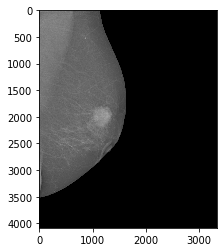

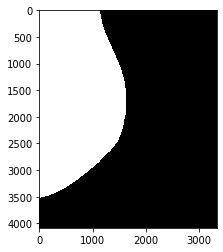

In [30]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import skimage.color

# Test saving DICOM images in tiff format
file_name = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999432_f62fbf38fb208316_MG_L_ML_ANON.dcm'
dicom_data = dicom.dcmread(file_name)
data = dicom_data.pixel_array
print("The shape of original DICOM image is: ", data.shape)
Image.fromarray(data).save('dicom_tiff_test.tif')

print("**********************************************")

# Load the stored tiff-format DICOM image
dicom_tiff = Image.open('dicom_tiff_test.tif')   
dicom_tiff = np.array(dicom_tiff)
print("DICOM image stored in tiff format:", type(dicom_tiff[1,1]))
print("DICOM image stored in tiff format has shape of: ", dicom_tiff.shape )
plt.figure(2)
plt.imshow(dicom_tiff, cmap = 'gray')

print("**********************************************")

# Use PIL to do RGB conversion
dicom_PIL_rgb = np.array(Image.open('dicom_tiff_test.tif').convert('RGB'))
print("Using pillow to convert it imnto RGB color map...")
print("The shape of image using pillow to do conversion: ", dicom_PIL_rgb.shape)
print("Type of the element: ", type(dicom_PIL_rgb[1,1,1]))
plt.figure(3)
plt.imshow(dicom_PIL_rgb)


print("**********************************************")

# Use cv2 to do RGB conversion
dicom_cv2_rgb =cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)
print("Using cv2 to convert it into RGB color map...")
print("The shape of image using cv2 to do conversion: ", dicom_cv2_rgb.shape)
print("Type of the element: ", type(dicom_cv2_rgb[1,1,1]))

print("**********************************************")

# Use scikit-image to do RGB conversion (As did in the keras-retinanet repository)
dicom_skimage_rgb = skimage.color.gray2rgb(data)
print("Using scikit-image to convert it into RGB color map...")
print("The shape of image using scikit-image to do conversion: ", dicom_skimage_rgb.shape)
print("Type of the element: ", type(dicom_skimage_rgb[1,1,1]))

# The result for cv2 and scikit-image are the same.
print(dicom_skimage_rgb[255,221,0] == dicom_cv2_rgb[255,221,0])
print(dicom_PIL_rgb[255,221,0] == dicom_cv2_rgb[255,221,0])

In [70]:
import numpy as np
import skimage.color
import cv2

test = np.array([[1,2,3],[4,5,6]])
test = test.astype(np.uint16)
print(test)
print(test.shape)
print(type(test))
print(type(test[1,1]))

# file_name = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999432_f62fbf38fb208316_MG_L_ML_ANON.dcm'
# dicom_data = dicom.dcmread(file_name)
# data = dicom_data.pixel_array
# print(data.shape)
# print(type(data))
# print(data)
# dicom_cv2_rgb =cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)

test_cv2_rgb =cv2.cvtColor(test, cv2.COLOR_GRAY2RGB)
test_ski_rgb = skimage.color.gray2rgb(test)

print(test_cv2_rgb)
print("******************************")
print(test_ski_rgb)

# Conclusion:
# 1) In order to use the GRAY2RGB of cv2, the gray image must be in uint16, not uint8.
# 2) The result given by cv2 and scikit-image are the same, just duplicate the single channel into three.

[[1 2 3]
 [4 5 6]]
(2, 3)
<class 'numpy.ndarray'>
<class 'numpy.uint16'>
[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]]
******************************
[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]]


In [14]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import skimage.color

image = Image.open("test_here.png")
print(type(image))
aspect_ratio_1 = float(image.width) / float(image.height)
print(aspect_ratio_1)
image_array = np.array(image)
print(float(image_array.shape[1]) / float(image_array.shape[0]))


<class 'PIL.PngImagePlugin.PngImageFile'>
0.8148873653281097
0.8148873653281097
